In [11]:
import copy
from matplotlib import pyplot as plt
from matplotlib import animation
%matplotlib notebook

In [14]:
training_set = [[(1, 2), 1], [(2, 3), 1], [(3, 1), -1], [(4, 2), -1]]  # 训练数据集
w = [0, 0]  # 参数初始化
b = 0
history = []  # 用来记录每次更新过后的w,b

def update(item):
    """
    随机梯度下降更新参数
    参数：分类错误的点
    返回：无返回值
    """
    global w, b, history  # 把w, b, history声明为全局变量
    w[0] += 1 * item[1] * item[0][0]  # 根据误分类点更新参数,这里学习效率设为1 eta=1
    w[1] += 1 * item[1] * item[0][1]
    b += 1 * item[1]
    history.append([copy.copy(w), b])  # 将每次更新过后的w,b记录在history数组中


def cal(item):
    """
    计算item到超平面的距离,输出yi(w*xi+b)
    （我们要根据这个结果来判断一个点是否被分类错了。如果yi(w*xi+b)>0,则分类错了）
    """
    res = 0
    for i in range(len(item[0])):  # 迭代item的每个坐标，对于本文数据则有两个坐标x1和x2
        res += item[0][i] * w[i]
    res += b
    res *= item[1]  # 这里是乘以公式中的yi
    return res


def check():
    """
    检查超平面是否已将样本正确分类
    :return: true如果已正确分类则返回True
    """
    flag = False
    for item in training_set:
        if cal(item) <= 0:  # 如果有分类错误的
            flag = True  # 将flag设为True
            update(item)  # 用误分类点更新参数
    if not flag:  # 如果没有分类错误的点了
        print("最终结果: w: " + str(w) + "b: " + str(b))  # 输出达到正确结果时参数的值
    return flag  # 如果已正确分类则返回True,否则返回False

最终结果: w: [-3, 4]b: 1


<IPython.core.display.Javascript object>


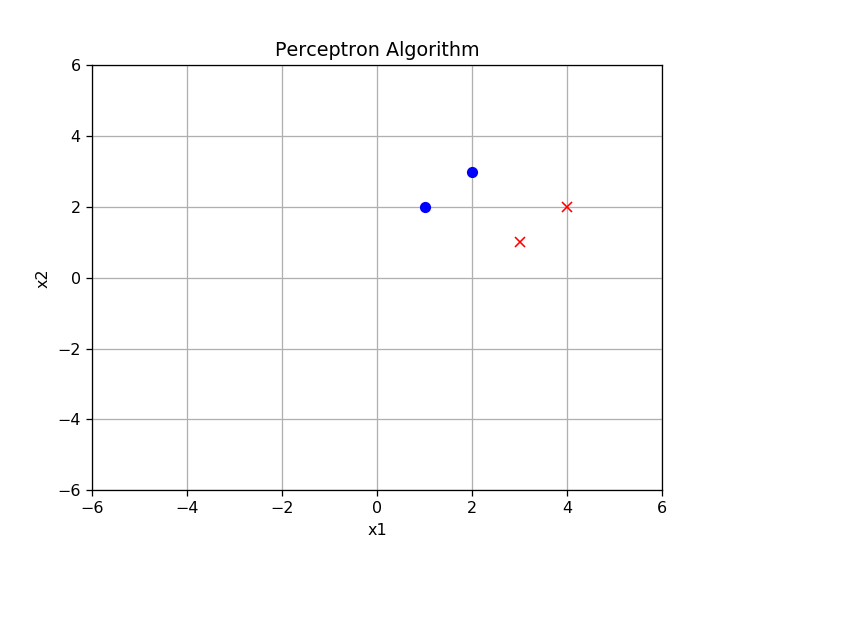

参数w,b更新过程： [[[1, 2], 1], [[-2, 1], 0], [[-1, 3], 1], [[-4, 2], 0], [[-3, 4], 1]]


In [18]:
if __name__ == "__main__":
    for i in range(1000):  # 迭代1000遍
        if not check(): break  # 如果已正确分类，则结束迭代
    # 以下代码是将迭代过程可视化
    # 首先建立我们想要做成动画的图像figure, 坐标轴axis,和plot element
    fig = plt.figure()
    ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
    line, = ax.plot([], [], 'g', lw=2)  # 画一条线
    label = ax.text([], [], '')
    
    line.set_data([], [])
    x, y, x_, y_ = [], [], [], []
    for p in training_set:
        if p[1] > 0:
            x.append(p[0][0])  # 存放yi=1的点的x1坐标
            y.append(p[0][1])  # 存放yi=1的点的x2坐标
        else:
            x_.append(p[0][0])  # 存放yi=-1的点的x1坐标
            y_.append(p[0][1])  # 存放yi=-1的点的x2坐标
    plt.plot(x, y, 'bo', x_, y_, 'rx')  # 在图里yi=1的点用点表示，yi=-1的点用叉表示
    plt.axis([-6, 6, -6, 6])  # 横纵坐标上下限
    plt.grid(True)  # 显示网格
    plt.xlabel('x1')  # 这里我修改了原文表示
    plt.ylabel('x2')  # 为了和原理中表达方式一致，横纵坐标应该是x1,x2
    plt.title('Perceptron Algorithm')  # 给图一个标题：感知机算法


    print("参数w,b更新过程：", history)